In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print('Shape of Train images :', train_images.shape)
print('Shape of Train labels :', train_labels.shape)
print('\nShape of Test images :', test_images.shape)
print('Shape of Test labels:', test_labels.shape)
print('\nTrain labels :', train_labels)
print('\n', train_images[1])

Shape of Train images : (60000, 28, 28)
Shape of Train labels : (60000,)

Shape of Test images : (10000, 28, 28)
Shape of Test labels: (10000,)

Train labels : [5 0 4 ... 5 6 8]

 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 

First 10 Train images in MNIST dataset



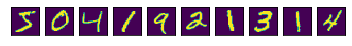


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [5]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n', train_labels[:10])

In [6]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [7]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)), #Layer 1
            keras.layers.MaxPool2D((2,2)), #Layer 2
            keras.layers.Flatten(),
            keras.layers.Dense(10,activation = 'softmax')]) #Layer 3
    if model_number == 2:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)), #Layer 1
            keras.layers.MaxPool2D((2,2)), #Layer 2
            keras.layers.Conv2D(64,(3,3),activation = 'relu'), #Layer 3
            keras.layers.MaxPool2D((2,2)), #Layer 4
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')]) #Layer 5
    if model_number == 3:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)), #Layer 1
            keras.layers.MaxPool2D((2,2)), #Layer 2
            keras.layers.Conv2D(64,(3,3), activation = 'relu'), #Layer 3
            keras.layers.Conv2D(64,(3,3), activation = 'relu'), #Layer 4
            keras.layers.MaxPool2D((2,2)), #Layer 5
            keras.layers.Conv2D(128, (3,3), activation = 'relu'), #Layer 6
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')]) #Layer 7
    return model

#1st model

In [8]:
model = select_model(1)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.8905 - accuracy: 0.9357
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0888 - accuracy: 0.9737
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0735 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0673 - accuracy: 0.98001s - loss: 0.0664 - accura - ETA
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0559 - accuracy: 0.9829


In [13]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 2s - loss: 0.1112 - accuracy: 0.9744

Test loss :  0.11119098961353302
Test accuracy : 0.974399983882904


In [14]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [15]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                        100*np.max(predictions_array),
                                        Number[true_label]),
                                        color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [23]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

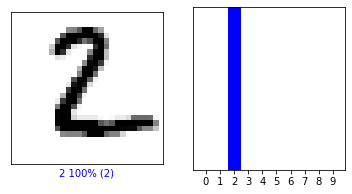

In [24]:
i=1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,pred,test_labels)
plt.show()

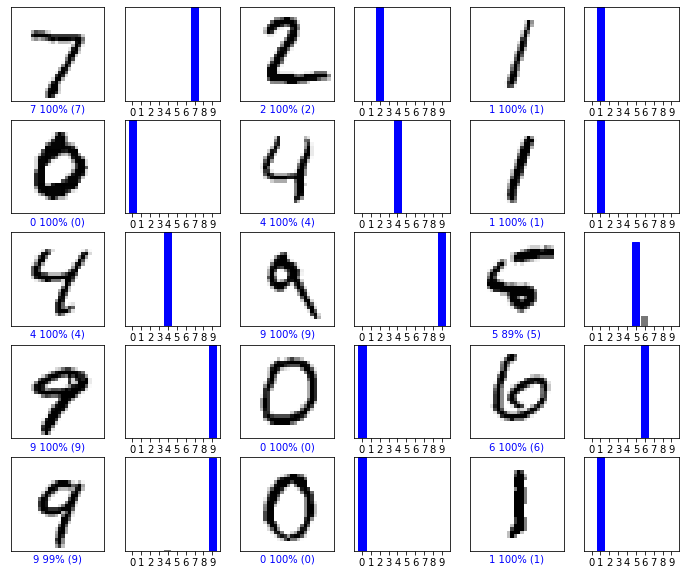

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [28]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i])!=true_label[i]:
            error_index.append(i)
    return error_index

def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    
    assert len(index)<num_cols*num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows,2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [29]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[33, 111, 175, 211, 243, 282, 320, 321, 337, 445]


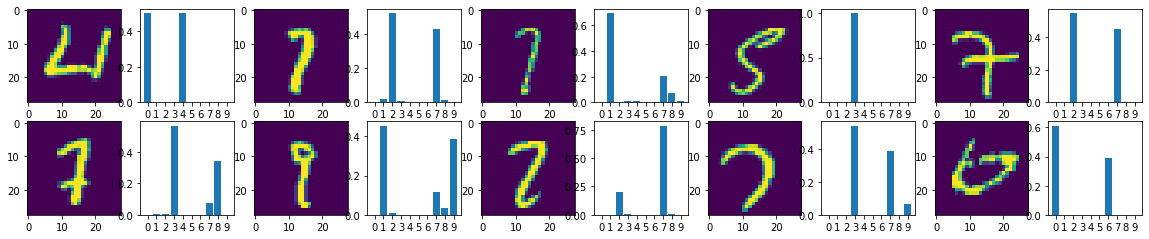

In [30]:
plot_error(index_slice, pred, test_labels)

#2nd model

In [40]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [42]:
model = select_model(2)

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [44]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [45]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.3248 - accuracy: 0.9477
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0653 - accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0534 - accuracy: 0.9835
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0444 - accuracy: 0.98690s - loss: 0.0444 - accura
Epoch 5/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0390 - accuracy: 0.9881


In [46]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 3s - loss: 0.0538 - accuracy: 0.9845

Test loss :  0.0537542924284935
Test accuracy : 0.984499990940094


In [47]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [48]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [49]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

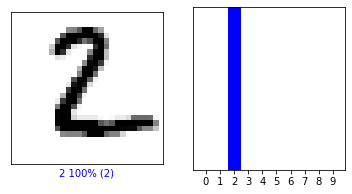

In [50]:
i=1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,pred,test_labels)
plt.show()

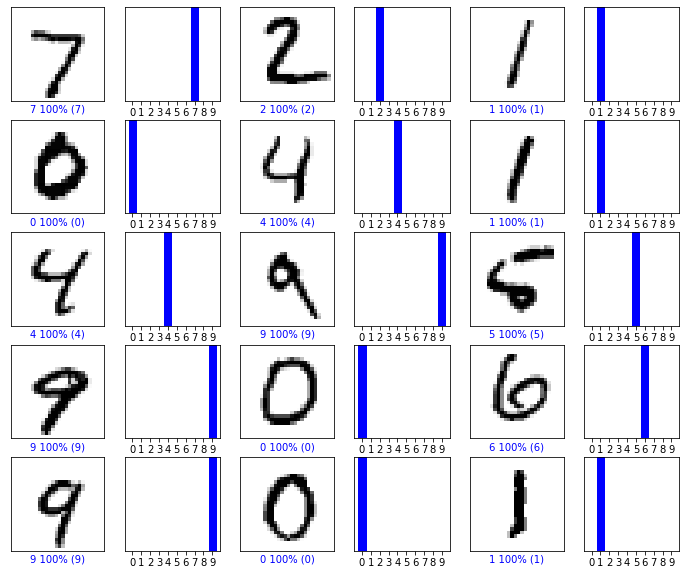

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [52]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[18, 62, 87, 175, 217, 245, 247, 259, 381, 417]


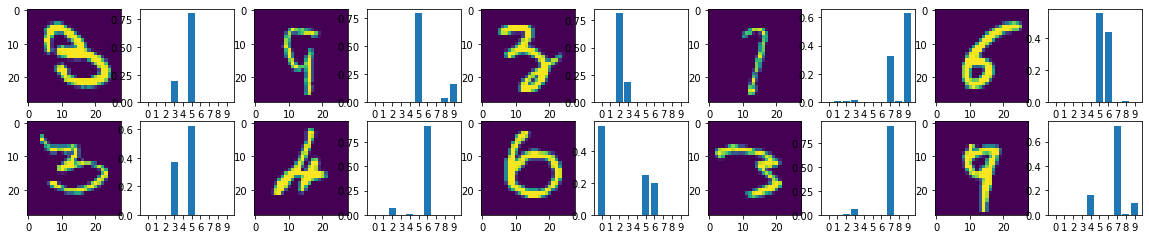

In [53]:
plot_error(index_slice, pred, test_labels)

#3rd model

In [54]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [55]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [56]:
model = select_model(3)

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [58]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [59]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1951 - accuracy: 0.9544
Epoch 2/5
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0576 - accuracy: 0.9824
Epoch 3/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0461 - accuracy: 0.9861
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0402 - accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0357 - accuracy: 0.9892


In [60]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 4s - loss: 0.0461 - accuracy: 0.9883

Test loss :  0.046145204454660416
Test accuracy : 0.9883000254631042


In [61]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [62]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [63]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

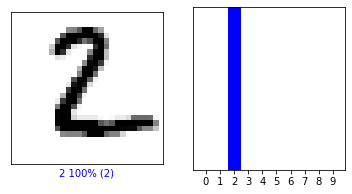

In [64]:
i=1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,pred,test_labels)
plt.show()

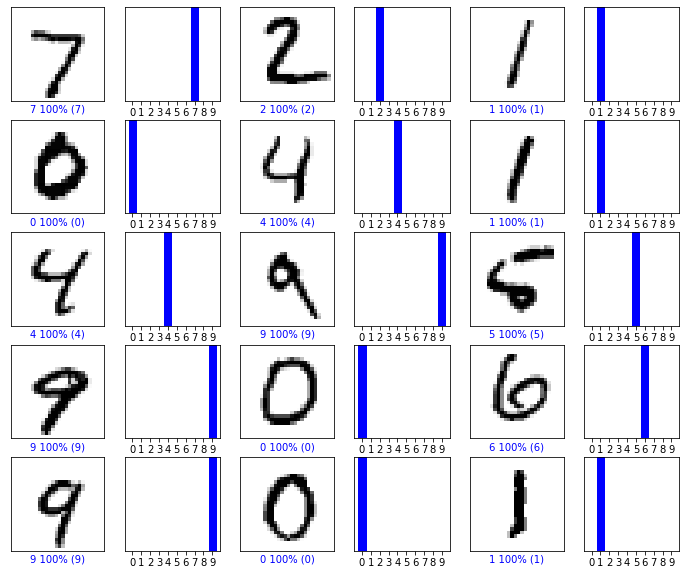

In [65]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [66]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[96, 111, 158, 449, 450, 495, 582, 619, 625, 659]


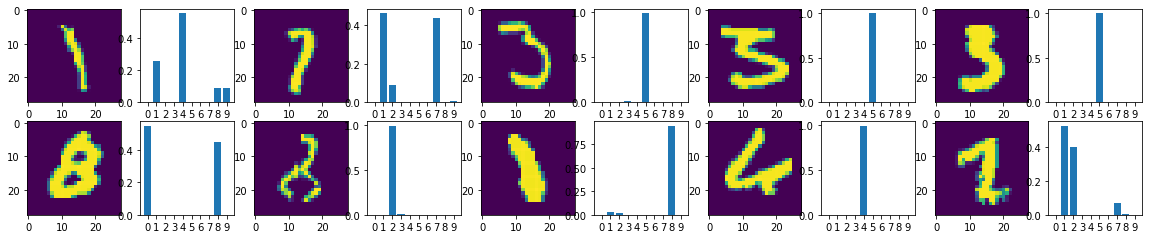

In [67]:
plot_error(index_slice, pred, test_labels)